In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size

In [6]:
# Load the dataset
import pandas as pd
try:
    df = pd.read_csv(r"C:\Users\Administrator\Desktop\CampbellThistlewaite1960-1 (1).csv")
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: Merits_scholarship.csv not found. Make sure the file is in the root folder.")
    # You might want to stop execution here or handle the error appropriately
    exit() # Or raise an exception

# Drop rows with non-numeric test scores or missing outcome data
# These are typically the first ('< 1') and last ('> 20') rows in this dataset
df = df[pd.to_numeric(df['test_score'], errors='coerce').notna()]

# Convert test_score to integer
df['test_score'] = df['test_score'].astype(int)

# Define the centered running variable (cutoff is between 10 and 11, so center at 10.5)
df['score_c'] = df['test_score'] - 10.5

# Define the treatment variable (1 if score >= 11, 0 otherwise)
df['treatment'] = (df['score_c'] > 0).astype(int)

# Define weights
df['weights'] = df['number_respondents']

# Drop rows with missing weights or zero weights if any
df = df.dropna(subset=['weights'])
df = df[df['weights'] > 0]

# Display data info and first few rows
print("\nData Information:")
df.info()
print("\nFirst 5 rows of prepared data:")
print(df.head())
print("\nLast 5 rows of prepared data:")
print(df.tail())

Data loaded successfully.

Data Information:
<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 1 to 20
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   certificate_of_merit  20 non-null     int64  
 1   test_score            20 non-null     int64  
 2   merit_scholars        10 non-null     float64
 3   number_in_sample      20 non-null     int64  
 4   number_respondents    20 non-null     int64  
 5   scholarship           20 non-null     float64
 6   scholarship_150       20 non-null     float64
 7   graduate_study        20 non-null     float64
 8   teacher_researcher    20 non-null     float64
 9   intellectualism       20 non-null     float64
 10  score_c               20 non-null     float64
 11  treatment             20 non-null     int64  
 12  weights               20 non-null     int64  
dtypes: float64(7), int64(6)
memory usage: 2.2 KB

First 5 rows of prepared data:
   certifi

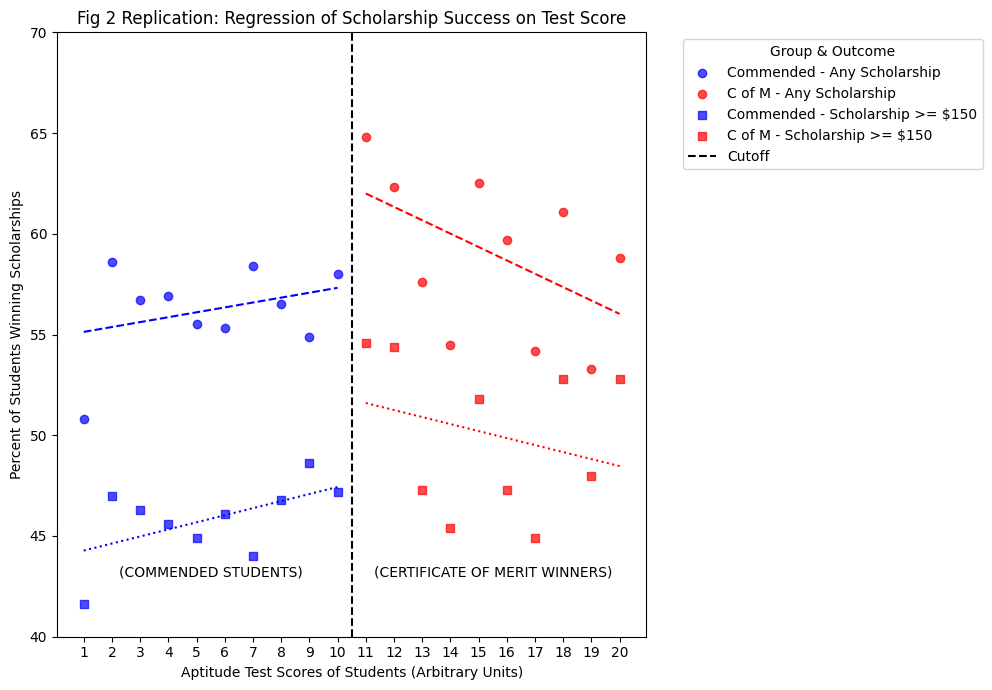

In [9]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Separate data for treatment and control groups
df_control = df[df['treatment'] == 0].copy()
df_treated = df[df['treatment'] == 1].copy()

# --- Plot for 'scholarship' (Any Scholarship) ---

# Fit WLS models for scholarship ~ score_c for each group
model_schol_control = smf.wls('scholarship ~ score_c', data=df_control, weights=df_control['weights']).fit()
model_schol_treated = smf.wls('scholarship ~ score_c', data=df_treated, weights=df_treated['weights']).fit()

# Generate predictions for the regression lines
df_control['pred_schol'] = model_schol_control.predict(df_control)
df_treated['pred_schol'] = model_schol_treated.predict(df_treated)

# --- Plot for 'scholarship_150' ($150 or More) ---

# Fit WLS models for scholarship_150 ~ score_c for each group
model_schol150_control = smf.wls('scholarship_150 ~ score_c', data=df_control, weights=df_control['weights']).fit()
model_schol150_treated = smf.wls('scholarship_150 ~ score_c', data=df_treated, weights=df_treated['weights']).fit()

# Generate predictions for the regression lines
df_control['pred_schol150'] = model_schol150_control.predict(df_control)
df_treated['pred_schol150'] = model_schol150_treated.predict(df_treated)


# --- Create the Plot (Replication of Figure 2) ---
plt.figure(figsize=(12, 7))

# Plot raw data points
plt.scatter(df_control['test_score'], df_control['scholarship'], color='blue', alpha=0.7, label='Commended - Any Scholarship')
plt.scatter(df_treated['test_score'], df_treated['scholarship'], color='red', alpha=0.7, label='C of M - Any Scholarship')
plt.scatter(df_control['test_score'], df_control['scholarship_150'], marker='s', color='blue', alpha=0.7, label='Commended - Scholarship >= $150')
plt.scatter(df_treated['test_score'], df_treated['scholarship_150'], marker='s', color='red', alpha=0.7, label='C of M - Scholarship >= $150')

# Plot regression lines
plt.plot(df_control['test_score'], df_control['pred_schol'], color='blue', linestyle='--')
plt.plot(df_treated['test_score'], df_treated['pred_schol'], color='red', linestyle='--')
plt.plot(df_control['test_score'], df_control['pred_schol150'], color='blue', linestyle=':')
plt.plot(df_treated['test_score'], df_treated['pred_schol150'], color='red', linestyle=':')

# Add cutoff line
plt.axvline(x=10.5, color='black', linestyle='--', label='Cutoff')

# Labels and Title
plt.xlabel("Aptitude Test Scores of Students (Arbitrary Units)")
plt.ylabel("Percent of Students Winning Scholarships")
plt.title("Fig 2 Replication: Regression of Scholarship Success on Test Score")
plt.ylim(40, 70) # Match approximate y-axis limits from original figure
plt.xticks(range(1, 21)) # Match x-axis ticks
plt.legend(title="Group & Outcome", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.text(5.5, 43, "(COMMENDED STUDENTS)", horizontalalignment='center')
plt.text(15.5, 43, "(CERTIFICATE OF MERIT WINNERS)", horizontalalignment='center')
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
plt.show()

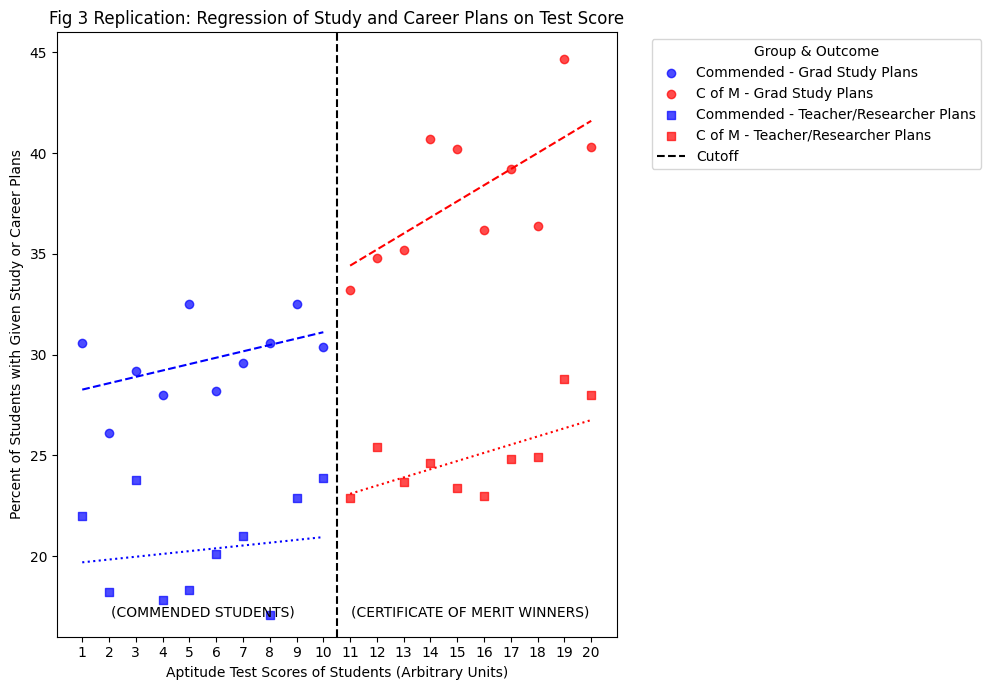

In [10]:
# --- Plot for 'graduate_study' (PhD or MD plans) ---

# Fit WLS models for graduate_study ~ score_c for each group
model_grad_control = smf.wls('graduate_study ~ score_c', data=df_control, weights=df_control['weights']).fit()
model_grad_treated = smf.wls('graduate_study ~ score_c', data=df_treated, weights=df_treated['weights']).fit()

# Generate predictions for the regression lines
df_control['pred_grad'] = model_grad_control.predict(df_control)
df_treated['pred_grad'] = model_grad_treated.predict(df_treated)

# --- Plot for 'teacher_researcher' (Career plans) ---

# Fit WLS models for teacher_researcher ~ score_c for each group
model_teach_control = smf.wls('teacher_researcher ~ score_c', data=df_control, weights=df_control['weights']).fit()
model_teach_treated = smf.wls('teacher_researcher ~ score_c', data=df_treated, weights=df_treated['weights']).fit()

# Generate predictions for the regression lines
df_control['pred_teach'] = model_teach_control.predict(df_control)
df_treated['pred_teach'] = model_teach_treated.predict(df_treated)


# --- Create the Plot (Replication of Figure 3) ---
plt.figure(figsize=(12, 7))

# Plot raw data points
plt.scatter(df_control['test_score'], df_control['graduate_study'], color='blue', alpha=0.7, label='Commended - Grad Study Plans')
plt.scatter(df_treated['test_score'], df_treated['graduate_study'], color='red', alpha=0.7, label='C of M - Grad Study Plans')
plt.scatter(df_control['test_score'], df_control['teacher_researcher'], marker='s', color='blue', alpha=0.7, label='Commended - Teacher/Researcher Plans')
plt.scatter(df_treated['test_score'], df_treated['teacher_researcher'], marker='s', color='red', alpha=0.7, label='C of M - Teacher/Researcher Plans')

# Plot regression lines
plt.plot(df_control['test_score'], df_control['pred_grad'], color='blue', linestyle='--')
plt.plot(df_treated['test_score'], df_treated['pred_grad'], color='red', linestyle='--')
plt.plot(df_control['test_score'], df_control['pred_teach'], color='blue', linestyle=':')
plt.plot(df_treated['test_score'], df_treated['pred_teach'], color='red', linestyle=':')

# Add cutoff line
plt.axvline(x=10.5, color='black', linestyle='--', label='Cutoff')

# Labels and Title
plt.xlabel("Aptitude Test Scores of Students (Arbitrary Units)")
plt.ylabel("Percent of Students with Given Study or Career Plans")
plt.title("Fig 3 Replication: Regression of Study and Career Plans on Test Score")
plt.ylim(16, 46) # Match approximate y-axis limits from original figure
plt.xticks(range(1, 21)) # Match x-axis ticks
plt.legend(title="Group & Outcome", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.text(5.5, 17, "(COMMENDED STUDENTS)", horizontalalignment='center')
plt.text(15.5, 17, "(CERTIFICATE OF MERIT WINNERS)", horizontalalignment='center')
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
plt.show()

In [11]:
# Dictionary to store RDD results
rdd_results = {}

# List of outcome variables to analyze
outcomes = ['scholarship', 'scholarship_150', 'graduate_study', 'teacher_researcher']

# Run RDD analysis for each outcome
for outcome in outcomes:
    formula = f"{outcome} ~ score_c * treatment"
    model = smf.wls(formula, data=df, weights=df['weights']).fit()

    # Extract point estimate and confidence interval for the treatment effect
    point_estimate = model.params['treatment']
    conf_int = model.conf_int().loc['treatment']
    ci_lower = conf_int[0]
    ci_upper = conf_int[1]
    p_value = model.pvalues['treatment'] # Also get the p-value

    # Store results
    rdd_results[outcome] = {
        'estimate': point_estimate,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        'p_value': p_value,
        'summary': model.summary().tables[1] # Store coefficient table for reference
    }

    print(f"--- RDD Results for {outcome} ---")
    print(f"Estimated Discontinuity (Treatment Effect): {point_estimate:.3f}")
    print(f"95% Confidence Interval: [{ci_lower:.3f}, {ci_upper:.3f}]")
    print(f"P-value: {p_value:.4f}")
    # print(rdd_results[outcome]['summary']) # Optionally print the full coefficient table
    print("-" * 30)

--- RDD Results for scholarship ---
Estimated Discontinuity (Treatment Effect): 4.894
95% Confidence Interval: [-0.976, 10.764]
P-value: 0.0962
------------------------------
--- RDD Results for scholarship_150 ---
Estimated Discontinuity (Treatment Effect): 4.166
95% Confidence Interval: [-1.712, 10.044]
P-value: 0.1524
------------------------------
--- RDD Results for graduate_study ---
Estimated Discontinuity (Treatment Effect): 2.747
95% Confidence Interval: [-1.678, 7.173]
P-value: 0.2068
------------------------------
--- RDD Results for teacher_researcher ---
Estimated Discontinuity (Treatment Effect): 1.876
95% Confidence Interval: [-2.225, 5.977]
P-value: 0.3466
------------------------------


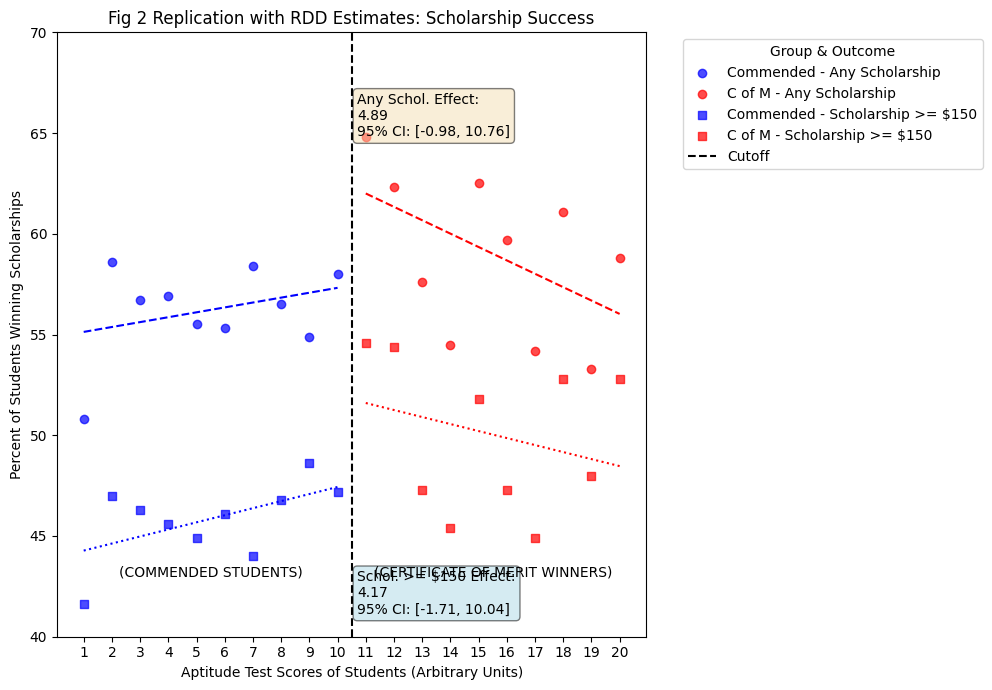

In [12]:
# --- Re-Plot Figure 2 with Annotations ---
plt.figure(figsize=(12, 7))

# Plot raw data points (as before)
plt.scatter(df_control['test_score'], df_control['scholarship'], color='blue', alpha=0.7, label='Commended - Any Scholarship')
plt.scatter(df_treated['test_score'], df_treated['scholarship'], color='red', alpha=0.7, label='C of M - Any Scholarship')
plt.scatter(df_control['test_score'], df_control['scholarship_150'], marker='s', color='blue', alpha=0.7, label='Commended - Scholarship >= $150')
plt.scatter(df_treated['test_score'], df_treated['scholarship_150'], marker='s', color='red', alpha=0.7, label='C of M - Scholarship >= $150')

# Plot regression lines (as before)
plt.plot(df_control['test_score'], df_control['pred_schol'], color='blue', linestyle='--')
plt.plot(df_treated['test_score'], df_treated['pred_schol'], color='red', linestyle='--')
plt.plot(df_control['test_score'], df_control['pred_schol150'], color='blue', linestyle=':')
plt.plot(df_treated['test_score'], df_treated['pred_schol150'], color='red', linestyle=':')

# Add cutoff line
plt.axvline(x=10.5, color='black', linestyle='--', label='Cutoff')

# Add Annotations for RDD results
schol_res = rdd_results['scholarship']
schol150_res = rdd_results['scholarship_150']

# Annotation text - position might need tweaking based on plot
y_pos_schol = 67 # Approximate y position for annotation
y_pos_schol150 = 41

annot_schol = f"Any Schol. Effect:\n{schol_res['estimate']:.2f}\n95% CI: [{schol_res['ci_lower']:.2f}, {schol_res['ci_upper']:.2f}]"
annot_schol150 = f"Schol. >= $150 Effect:\n{schol150_res['estimate']:.2f}\n95% CI: [{schol150_res['ci_lower']:.2f}, {schol150_res['ci_upper']:.2f}]"

plt.text(10.7, y_pos_schol, annot_schol, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', fc='wheat', alpha=0.5))
plt.text(10.7, y_pos_schol150, annot_schol150, verticalalignment='bottom', bbox=dict(boxstyle='round,pad=0.3', fc='lightblue', alpha=0.5))


# Labels and Title
plt.xlabel("Aptitude Test Scores of Students (Arbitrary Units)")
plt.ylabel("Percent of Students Winning Scholarships")
plt.title("Fig 2 Replication with RDD Estimates: Scholarship Success")
plt.ylim(40, 70)
plt.xticks(range(1, 21))
plt.legend(title="Group & Outcome", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.text(5.5, 43, "(COMMENDED STUDENTS)", horizontalalignment='center')
plt.text(15.5, 43, "(CERTIFICATE OF MERIT WINNERS)", horizontalalignment='center')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

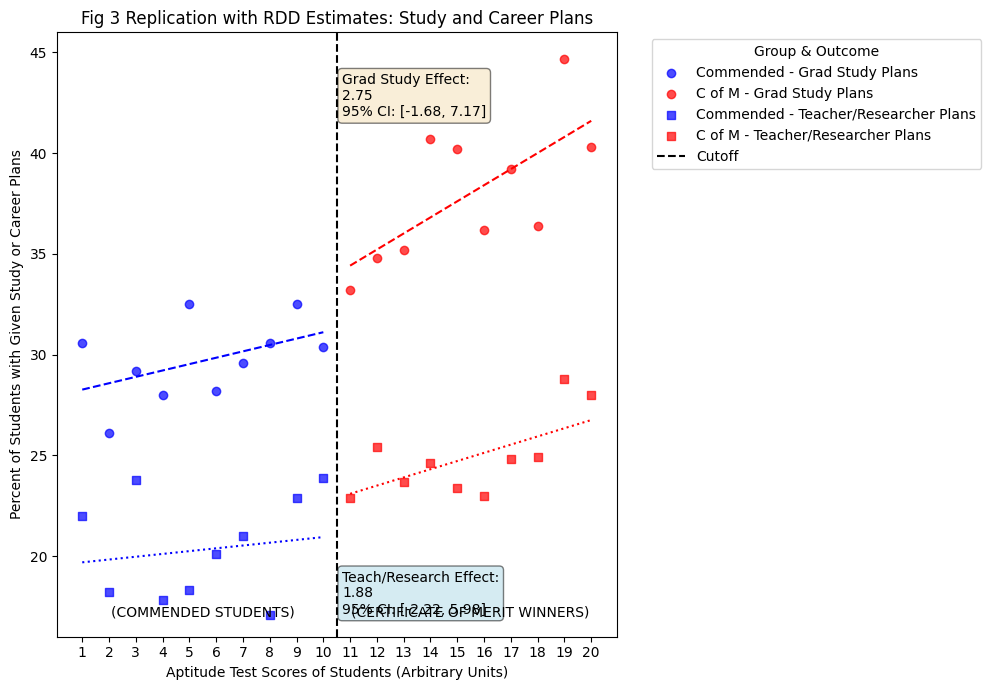

In [13]:
# --- Re-Plot Figure 3 with Annotations ---
plt.figure(figsize=(12, 7))

# Plot raw data points (as before)
plt.scatter(df_control['test_score'], df_control['graduate_study'], color='blue', alpha=0.7, label='Commended - Grad Study Plans')
plt.scatter(df_treated['test_score'], df_treated['graduate_study'], color='red', alpha=0.7, label='C of M - Grad Study Plans')
plt.scatter(df_control['test_score'], df_control['teacher_researcher'], marker='s', color='blue', alpha=0.7, label='Commended - Teacher/Researcher Plans')
plt.scatter(df_treated['test_score'], df_treated['teacher_researcher'], marker='s', color='red', alpha=0.7, label='C of M - Teacher/Researcher Plans')

# Plot regression lines (as before)
plt.plot(df_control['test_score'], df_control['pred_grad'], color='blue', linestyle='--')
plt.plot(df_treated['test_score'], df_treated['pred_grad'], color='red', linestyle='--')
plt.plot(df_control['test_score'], df_control['pred_teach'], color='blue', linestyle=':')
plt.plot(df_treated['test_score'], df_treated['pred_teach'], color='red', linestyle=':')

# Add cutoff line
plt.axvline(x=10.5, color='black', linestyle='--', label='Cutoff')

# Add Annotations for RDD results
grad_res = rdd_results['graduate_study']
teach_res = rdd_results['teacher_researcher']

# Annotation text - position might need tweaking
y_pos_grad = 44 # Approximate y position for annotation
y_pos_teach = 17

annot_grad = f"Grad Study Effect:\n{grad_res['estimate']:.2f}\n95% CI: [{grad_res['ci_lower']:.2f}, {grad_res['ci_upper']:.2f}]"
annot_teach = f"Teach/Research Effect:\n{teach_res['estimate']:.2f}\n95% CI: [{teach_res['ci_lower']:.2f}, {teach_res['ci_upper']:.2f}]"

plt.text(10.7, y_pos_grad, annot_grad, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', fc='wheat', alpha=0.5))
plt.text(10.7, y_pos_teach, annot_teach, verticalalignment='bottom', bbox=dict(boxstyle='round,pad=0.3', fc='lightblue', alpha=0.5))


# Labels and Title
plt.xlabel("Aptitude Test Scores of Students (Arbitrary Units)")
plt.ylabel("Percent of Students with Given Study or Career Plans")
plt.title("Fig 3 Replication with RDD Estimates: Study and Career Plans")
plt.ylim(16, 46)
plt.xticks(range(1, 21))
plt.legend(title="Group & Outcome", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.text(5.5, 17, "(COMMENDED STUDENTS)", horizontalalignment='center')
plt.text(15.5, 17, "(CERTIFICATE OF MERIT WINNERS)", horizontalalignment='center')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()